# **Hierarichal Clustering**

Hierarichal Clustering is a unsupervised learning algorithm, based on the groups having similar objects grouping down into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.
The algorithm works as follows:  <br>
1. First, Identify the 2 clusters which can be closest together, and
2. Than, Merge the 2 maximum comparable clusters.
3. Repeat the process until all the clusters are merged together.

In [1]:
import numpy as np

class AgglomerativeClustering:
    def __init__(self, n_clusters=2):
        self.n_clusters = n_clusters
        self.labels_ = None

    def fit(self, X):
        n_samples = X.shape[0]
        # Start with each sample as its own cluster
        clusters = [[i] for i in range(n_samples)]
        distances = self._compute_distances(X)

        while len(clusters) > self.n_clusters:
            # Find the two closest clusters
            closest_clusters = self._find_closest_clusters(distances, clusters)
            # Merge them
            clusters = self._merge_clusters(clusters, closest_clusters)
            # Update distances
            distances = self._update_distances(distances, closest_clusters, clusters)

        # Assign labels based on the final clusters
        self.labels_ = np.zeros(n_samples, dtype=int)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                self.labels_[sample_idx] = cluster_idx

    def _compute_distances(self, X):
        n_samples = X.shape[0]
        distances = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(i + 1, n_samples):
                distances[i, j] = distances[j, i] = np.linalg.norm(X[i] - X[j])
        return distances

    def _find_closest_clusters(self, distances, clusters):
        min_distance = np.inf
        closest_clusters = None
        for i, cluster_i in enumerate(clusters):
            for j, cluster_j in enumerate(clusters):
                if i >= j:
                    continue
                distance = self._compute_cluster_distance(distances, cluster_i, cluster_j)
                if distance < min_distance:
                    min_distance = distance
                    closest_clusters = (i, j)
        return closest_clusters

    def _compute_cluster_distance(self, distances, cluster_i, cluster_j):
        return np.min([distances[p][q] for p in cluster_i for q in cluster_j])

    def _merge_clusters(self, clusters, closest_clusters):
        cluster_i, cluster_j = closest_clusters
        merged_cluster = clusters[cluster_i] + clusters[cluster_j]
        clusters = [cluster for idx, cluster in enumerate(clusters) if idx not in closest_clusters]
        clusters.append(merged_cluster)
        return clusters

    def _update_distances(self, distances, closest_clusters, clusters):
        cluster_i, cluster_j = closest_clusters
        new_distances = distances.copy()
        merged_cluster = clusters[-1]  # The last cluster is the newly merged cluster
        for k, cluster in enumerate(clusters[:-1]):  # Update distances for all but the last (new) cluster
            if k == cluster_i or k == cluster_j:
                continue
            new_distance = self._compute_cluster_distance(distances, cluster, merged_cluster)
            for i in cluster:
                for j in merged_cluster:
                    new_distances[i, j] = new_distances[j, i] = new_distance
        return new_distances

    def predict(self, X):
        # Hierarchical clustering doesn't naturally include a predict method
        raise NotImplementedError("Predict method is not implemented for hierarchical clustering.")

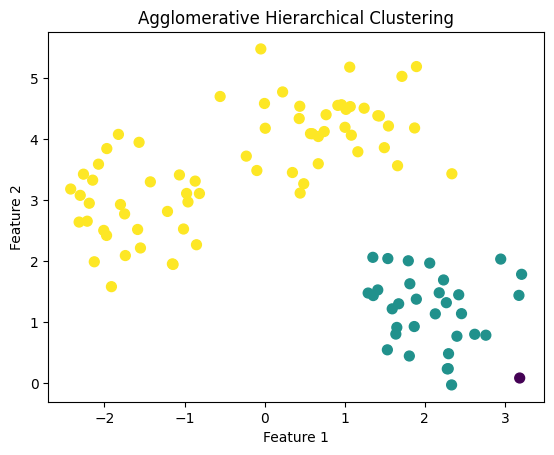

In [2]:
if __name__ == "__main__":
    from sklearn.datasets import make_blobs
    import matplotlib.pyplot as plt

    # Generate a sample dataset
    X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.60, random_state=0)

    # Train the model
    agglomerative_clustering = AgglomerativeClustering(n_clusters=3)
    agglomerative_clustering.fit(X)

    # Plot the results
    plt.scatter(X[:, 0], X[:, 1], c=agglomerative_clustering.labels_, s=50, cmap='viridis')
    plt.title("Agglomerative Hierarchical Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()